# Sensor data simulator in a smart home

We refered to and borrowed some parts of a simulator of [1, 2].  
[1] C. Jiang and A. Mita, "Sisg4hei alpha: Alpha version of simulated indoor scenario generator for houses with elderly individuals." Journal of Building Engineering, 35-101963 (2021).  
[2] https://github.com/Idontwan/SISG4HEI_Alpha

# Import libraries

In [1]:
import datetime
import itertools
import os
import pprint
import random
import time
from copy import deepcopy
from pathlib import Path
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# self-made
import activity_model
import analysis
import anomaly
import comparison
import floor_plan

import new_functions
import sensor_model

working_path = Path().resolve()
layout_data_path = working_path / 'layout_data'
output_path = working_path / 'output'

# Generate a new layout data, height data, and information for path generation.

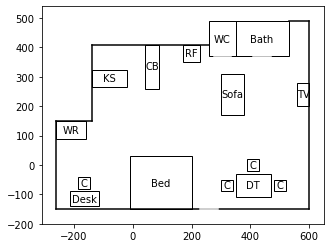

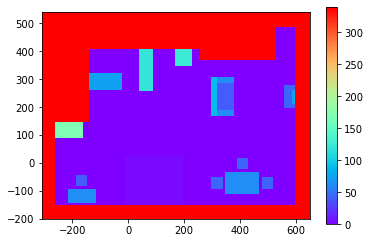

A floor plan was generated in (14.950008392333984[s])!
The path is D:\tanakai\Document\git\Simulator\layout_data\2023_04_07_01_52_20


In [3]:
temp_time = time.time()

fp = floor_plan.FloorPlan()

necessary_furniture = ['Bed', 'Wardrobe', 'Desk', 'Kitchen_Stove', 'Refrigerator', 'Sofa', 'TV', 'Dinner_Table', 'Entrance', 'Toilet_Door', 'Bathroom_Door']
# necessary_furniture = ['Bed', 'Wardrobe', 'Desk', 'Kitchen_Stove', 'Refrigerator', 'Sofa', 'TV', 'Dinner_Table', 'Wash_Machine', 'Trash_Bin', 'Entrance', 'Toilet_Door', 'Bathroom_Door']

# path = fp.generate_layout(layout_data_path, error_message = True)  # no constraints of furniture
path = fp.generate_layout_with_necessary_furniture(layout_data_path, necessary_furniture = necessary_furniture)
if path == None:
    raise ValueError('Failed to generate a layout.')
fp.sample_height_data(path)
fp.save_layout_figure(path, show = True)
fp.save_height_figure(path, show = True)
fp.save_distance(path)

print("A floor plan was generated in ({}[s])!\nThe path is {}".format(time.time() - temp_time, path))

## Explain floor plan simulator in detail step by step

### Generate a new layout and save it as a json file

In [5]:
# no constrains of furniture
fp = floor_plan.FloorPlan()
path = fp.generate_layout(layout_data_path)
print(path)

D:\tanakai\Document\git\Simulator\layout_data\2023_04_07_01_57_00


In [6]:
# specify the furniture that must be included
fp = floor_plan.FloorPlan()
necessary_furniture = ['Bed', 'Wardrobe', 'Desk', 'Kitchen_Stove', 'Refrigerator', 'Sofa', 'TV', 'Dinner_Table', 'Entrance', 'Toilet_Door', 'Bathroom_Door']
path = fp.generate_layout_with_necessary_furniture(layout_data_path, necessary_furniture = necessary_furniture)
if path == None:
    raise ValueError('cannnot make the layout')
print(path)

D:\tanakai\Document\git\Simulator\layout_data\2023_04_07_01_57_51


### Load and save the layout

In [9]:
path = Path(layout_data_path / 'test_layout')  # test_layout
fp = floor_plan.FloorPlan()
fp.load_layout(path)

print(fp.House)
print(fp.Furnitures)

path = fp.save_layout_data(path)

[[-190, -210, 380, 420, 'Bedroom'], [690, -90, 320, 300, 'Kitchen'], [190, -210, 500, 420, 'Livingroom']]
[[[-190, 0, 150, 210, 'Bed'], [-190, -165, 120, 60, 'Wardrobe'], [40, -200, 50, 120, 'Desk'], [100, -160, 40, 40, 'Desk_Chair']], [[950, 30, 60, 180, 'Kitchen_Stove'], [720, -90, 50, 120, 'Cupboard'], [830, -90, 60, 60, 'Refrigerator'], [830, 150, 60, 60, 'Wash_Machine'], [720, 150, 30, 60, 'Trash_Bin']], [[250, -90, 140, 80, 'Sofa'], [280, 170, 80, 40, 'TV'], [515, 90, 80, 120, 'Dinner_Table'], [605, 130, 40, 40, 'Dinner_Table_Chair'], [535, 40, 40, 40, 'Dinner_Table_Chair']]]


### Sample a height data and save it

In [10]:
path = Path(layout_data_path / 'test_layout')
fp = floor_plan.FloorPlan()
fp.load_layout(path)
fp.sample_height_data(path)

### Load a layout data and save the figures

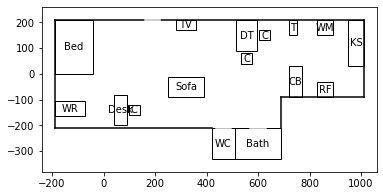

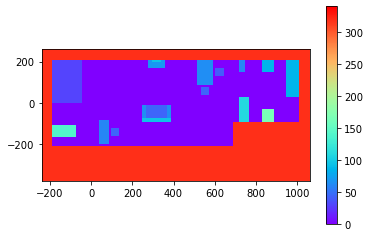

In [11]:
path = Path(layout_data_path / 'test_layout')
fp = floor_plan.FloorPlan()
fp.load_layout(path)
fp.load_height(path)
fp.save_layout_figure(path, show = True)
fp.save_height_figure(path, show = True)

### Generate information for path generation, including 2D array of distance.

In [13]:
fp = floor_plan.FloorPlan()
path = Path(layout_data_path / 'test_layout')
fp.load_layout(path)
fp.load_height(path)
fp.save_distance(path)
print([x.name for x in list(path.iterdir())])  # files in the path

['Bathroom_Door_distance.csv', 'Bed_distance.csv', 'Chair_distance.csv', 'Cupboard_distance.csv', 'Desk_Chair_distance.csv', 'Desk_distance.csv', 'Destinations.json', 'Dinner_Table_Chair_distance.csv', 'Dinner_Table_distance.csv', 'Discomfortable_value.csv', 'Entrance_distance.csv', 'Height_Function.json', 'Height_Function.png', 'Kitchen_Stove_distance.csv', 'Layout.png', 'Layout_PIR_pressure.png', 'Layout_PIR_pressure_cost.png', 'Max_Distances.json', 'Refrigerator_distance.csv', 'Semantic.json', 'Sofa_distance.csv', 'Toilet_Door_distance.csv', 'Trash_Bin_distance.csv', 'TV_distance.csv', 'Wardrobe_distance.csv', 'Wash_Machine_distance.csv']


### Modify a layout data, e.g., change the furniture name.

In [14]:
path = Path(layout_data_path / 'test_layout')
fp = floor_plan.FloorPlan()
fp.load_layout(path)
fp.Furnitures[0][3][4] = 'Desk_Chair'
fp.save_layout_data(layout_data_path)

WindowsPath('D:/tanakai/Document/git/Simulator/layout_data')

# Generate an activity sequence

## Load a layout data to consider possible activities in the layout, then make an activity sequence

An activity sequence was generated in 0.015999317169189453[s]!
0 <ActivityDataPoint> <Activity>Sleep from 0:00:00 to 5:58:02.109533 at Bed
1 <ActivityDataPoint> <Activity>Rest from 5:58:02.109533 to 6:14:03.780476 at Sofa
2 <ActivityDataPoint> <Activity>Take a snack from 6:14:03.780476 to 6:18:21.579432 at Dinner_Table_Chair
3 <ActivityDataPoint> <Activity>Clean from 6:18:21.579432 to 6:22:09.262155 at Trash_Bin
4 <ActivityDataPoint> <Activity>Brush teeth from 6:22:09.262155 to 6:22:57.411776 at Bathroom_Door


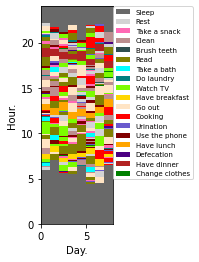

The activity sequence was saved as a text and figures in 14.242175340652466[s]


In [15]:
temp_time = time.time()

path = Path(layout_data_path / 'test_layout')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())  # create a folder to save data
start_day, end_day = 0, 6
AS = new_functions.generate_activity_sequence(start_day, end_day, path, original_act_model = activity_model.basic_activity_model)
print("An activity sequence was generated in {}[s]!".format(time.time() - temp_time))
for i, x in enumerate(AS[:5]):
    print("{} {}".format(i, x))

new_functions.save_activity_sequence(data_save_path, AS)  # save the activity sequence as a text
new_functions.save_activity_sequence_as_image(data_save_path, AS, show = True)  # save the activity sequence as an image
new_functions.save_activity_pie_chart(data_save_path, AS)  # save the activity seuqence like a pie chart, !!! time consuming !!!
print("The activity sequence was saved as a text and figures in {}[s]".format(time.time() - temp_time))

## Generate an activity sequence using applied activity models.

In [23]:
temp_time = time.time()

path = Path(layout_data_path / 'test_layout')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())
start_day, end_day = 0, 6

# act_model = activity_model.applied_activity_model  # e.g., eating activity is divided into some sub activities
act_model = activity_model.applied_activity_model_2  # e.g., urinations are apart from each other

AS = new_functions.generate_activity_sequence(start_day, end_day, path, original_act_model = act_model)
print("An activity sequence was generated in {}[s]!".format(time.time() - temp_time))
for i, x in enumerate(AS[:5]):
    print("{} {}".format(i, x))

new_functions.save_activity_sequence(data_save_path, AS)
new_functions.save_activity_sequence_as_image(data_save_path, AS)

# !! time consuming !!
new_functions.save_activity_pie_chart(data_save_path, AS)
# !! time consuming !!

print("The activity sequence was saved as a txt and figures in {}[s].".format(time.time() - temp_time))

An activity sequence was generated in 0.019509077072143555[s]!
0 <ActivityDataPoint> <Activity>Sleep from 0:00:00 to 6:16:30.279275 at Bed
1 <ActivityDataPoint> <Activity>Use the phone from 6:16:30.279275 to 6:19:08.223794 at Desk_Chair
2 <ActivityDataPoint> <Activity>Urination from 6:19:08.223794 to 6:21:29.715941 at Toilet_Door
3 <ActivityDataPoint> <Activity>Use the phone from 6:21:29.715941 to 6:25:38.399762 at Desk_Chair
4 <ActivityDataPoint> <Activity>Brush teeth from 6:25:38.399762 to 6:27:09.088959 at Bathroom_Door
The activity sequence was saved as a txt and figures in 12.900485515594482[s].


# Generate walking trajectories

## Generate resident's walking trajectories between activities, using a layout data and an activity sequence.

In [18]:
temp_time = time.time()

path = Path(layout_data_path / 'test_layout')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())

# generate an activity sequence (AS) and save it
AS = new_functions.generate_activity_sequence(0, 6, path, original_act_model = activity_model.basic_activity_model)
new_functions.save_activity_sequence(data_save_path, AS)
new_functions.save_activity_sequence_as_image(data_save_path, AS)
# new_functions.save_activity_pie_chart(data_save_path, AS)  # time consuming!
print("An activity sequence was generated in {}[s].".format(time.time() - temp_time))

# generate walking trajectories (WT) and save it
indoor_movement = activity_model.indoor_movement  # parameters about walking
WT = new_functions.generate_walking_trajectories(path, AS, indoor_movement.stride, indoor_movement.step_speed, indoor_movement.prefer_foot)
for x in WT[:10]:
    print(x)
print("Walking trajectories were generated in {}[s].".format(time.time() - temp_time))

# save the figures of walking trajectories
new_functions.save_layout(data_save_path, path, WT = WT)  # as a figure
new_functions.save_walking_trajectoires(data_save_path, WT)  # as a text

for i in range(5):  # each of first 5 trajectories
    new_functions.save_layout(data_save_path, path, WT = [WT[i]], filename = "Layout_{}_wt".format(i))  # i-th trajectories

An activity sequence was generated in 0.9578258991241455[s].
<WalkingTrajectory> type: Direct from Bed (7:13:59.256437) to Sofa (7:14:03.256437)
<WalkingTrajectory> type: Direct from Sofa (7:23:30.426440) to Toilet_Door (7:23:36.826440)
<WalkingTrajectory> type: Direct from Toilet_Door (7:26:56.189862) to Trash_Bin (7:27:01.789862)
<WalkingTrajectory> type: Direct from Trash_Bin (7:33:43.928401) to Dinner_Table_Chair (7:33:44.728401)
<WalkingTrajectory> type: Direct from Dinner_Table_Chair (8:08:51.342604) to Wash_Machine (8:08:53.742604)
<WalkingTrajectory> type: Direct from Wash_Machine (8:12:46.050382) to Kitchen_Stove (8:12:47.650382)
<WalkingTrajectory> type: Direct from Kitchen_Stove (8:53:31.125565) to Sofa (8:53:39.925565)
<WalkingTrajectory> type: Direct from Sofa (10:05:09.574634) to Desk_Chair (10:05:14.374634)
<WalkingTrajectory> type: Direct from Desk_Chair (10:12:47.128397) to Dinner_Table_Chair (10:12:55.128397)
<WalkingTrajectory> type: Direct from Dinner_Table_Chair (1

# Arrange sensors in a layout

### Arrange passive infrared (PIR) sensors and pressure sensors randomly

<Sensor>normal PIR(#0)(496.89, -153.32)


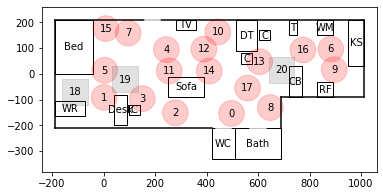

In [21]:
path = Path(layout_data_path / 'test_layout')
sensors = sensor_model.generate_test_sensor_arrange(path, th_discomfort = 90, num_PIR = 18, num_pressure = 3, min_d = 80.0, max_iter = 1000)
print(sensors[0])
new_functions.save_layout(path, path, sensors = sensors, show = True)

## Arrange sensors by manually

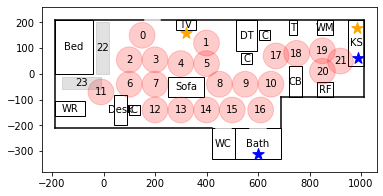

In [5]:
path = Path(layout_data_path / 'test_layout')
sensors = sensor_model.test_sensors  # Manually made sensor arrangement for ``test_layout``
new_functions.save_layout(path, path, sensors = sensors, show = True)

# Simulate sensor data by walking trajectories

In [24]:
temp_time = time.time()

path = Path(layout_data_path / 'test_layout')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())

# generate an activity sequence (AS)
AS = new_functions.generate_activity_sequence(0, 6, path, original_act_model = activity_model.basic_activity_model)
print("Activity sequence was generated in {}[s].".format(time.time() - temp_time))
new_functions.save_activity_sequence(data_save_path, AS)
new_functions.save_activity_sequence_as_image(data_save_path, AS)
# new_functions.save_activity_pie_chart(data_save_path, AS)  !! time consuming !!

# generate walking trajectories (WT)
indoor_movement = activity_model.indoor_movement  # parameters about walking
WT = new_functions.generate_walking_trajectories(path, AS, indoor_movement.stride, indoor_movement.step_speed, indoor_movement.prefer_foot)
print("Walking trajectories was generated in {}[s].".format(time.time() - temp_time))
new_functions.save_walking_trajectoires(data_save_path, WT)

# sensor arrangement
sensors = sensor_model.test_sensors  # for the test_layout

# save various figures
PIR_sensors = [s for s in sensors if isinstance(s, sensor_model.CircularPIRSensor)]
pressure_sensors = [s for s in sensors if isinstance(s, sensor_model.SquarePressureSensor)]
new_functions.save_layout(data_save_path, path, WT = WT)  # only walking trajectories
new_functions.save_layout(data_save_path, path, sensors = PIR_sensors)  # only PIR sensors
new_functions.save_layout(data_save_path, path, sensors = pressure_sensors)  # only pressure sensors
new_functions.save_layout(data_save_path, path, sensors = sensors)  # all sensors
new_functions.save_layout(data_save_path, path, sensors = sensors, WT = WT)  # all sensors and walking trajectories
new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [WT[0]], filename = 'Layout_first_wt')  # all sensors and first trajectories

# simulate sensor data that is related with resident's move
motion_sensor_data = new_functions.generate_motion_sensor_data(sensors, WT, 
    sampling_seconds = 0.1, sync_reference_point = AS[0].start, body_radius = 10)
print("Motion sensor data was simulated in {}[s].".format(time.time() - temp_time))
for x in motion_sensor_data[:5]:
    print(x)
new_functions.save_binary_sensor_data(data_save_path, sensors, motion_sensor_data, filename = 'PIR_pressure')  # as a text

# simulate cost sensor data that is related with the home appliances
cost_sensor_data = new_functions.generate_cost_sensor_data(sensors, AS, WT, sampling_seconds = 1, sync_reference_point = AS[0].start)
new_functions.save_binary_sensor_data(data_save_path, sensors, cost_sensor_data, filename = 'cost')

# save all sensor data
new_functions.save_binary_sensor_data(data_save_path, sensors, motion_sensor_data + cost_sensor_data)

print("Finished ({}[s])".format(time.time() - temp_time))

Activity sequence was generated in 0.014001607894897461[s].
Walking trajectories was generated in 19.373855113983154[s].
Motion sensor data was simulated in 39.21980953216553[s].
(datetime.timedelta(seconds=19779, microseconds=200000), 23, True)
(datetime.timedelta(seconds=19780, microseconds=600000), 11, True)
(datetime.timedelta(seconds=19781, microseconds=500000), 23, False)
(datetime.timedelta(seconds=19781, microseconds=900000), 11, False)
(datetime.timedelta(seconds=19782, microseconds=300000), 6, True)
Finished (42.28132724761963[s])


# Anomalies simulation

Anomalies
- Being housebound
- Being semi-bedridden
- Wandering
- Falling (falling while walking)
- FallingHP (means falling from a High Place like bed)
- Forgetting

Hidden variables
- Mini-mental state examination (MMSE) score

## Mini-mental state examination (MMSE) score as a hidden variable

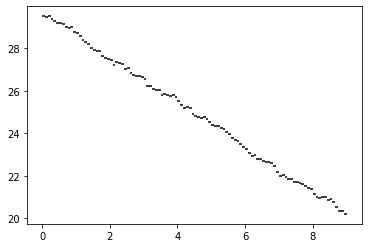

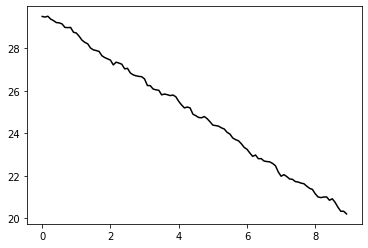

In [28]:
from numpy.random import normal

start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)

graph_time_step = timedelta(days = 360)
for (s, e, mmse) in MMSE:
    plt.hlines(y = mmse, xmin = s / graph_time_step, xmax = e / graph_time_step, color = 'k')
plt.show()
plt.close()

graph_time_step = timedelta(days = 360)
plt.plot([x[0] / graph_time_step for x in MMSE], [x[2] for x in MMSE], color = 'k')
plt.show()
plt.close()

## Being housebound and being semi-bedridden

### Simulate labels of being housebound and being semi-bedridden

hosuebound_labels[0]: (datetime.timedelta(days=530), datetime.timedelta(days=543, seconds=25675, microseconds=868591))
semi_bedridden_labels[0]: (datetime.timedelta(days=503), datetime.timedelta(days=532, seconds=71240, microseconds=567887))


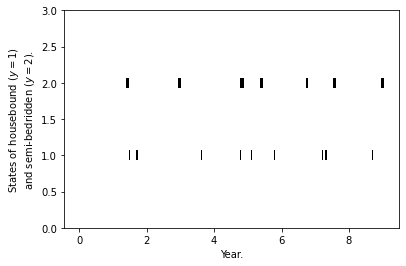

In [30]:
temp_time = time.time()

path = Path(layout_data_path / 'test_layout')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())

start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)
anomaly.save_MMSE(data_save_path, MMSE)

# housebound
# housebound_labels[i] = (start_time, end_time) of i-th being housebound
housebound_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/10, 14, 14/5)
print("hosuebound_labels[0]: {}".format(housebound_labels[0]))

# semi-bedridden
# semi_bedridden_labels[i] = (start_time, end_time) of i-th being semi-bedridden
semi_bedridden_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/20, 30, 30/5)
print("semi_bedridden_labels[0]: {}".format(semi_bedridden_labels[0]))

# plot
graph_time_step = timedelta(days = 360)
point_0, point_last = (timedelta(days = 0), timedelta(days = 0)), (timedelta(days = MMSE[-1][1].days), timedelta(days =  MMSE[-1][1].days))
graph_housebound = deepcopy(housebound_labels)
graph_semi_bedridden = deepcopy(semi_bedridden_labels)
for p in [point_0, point_last]:
    graph_housebound.append(p)
    graph_semi_bedridden.append(p)
plt.xlabel('Year.')
plt.ylabel('States of housebound ($y = 1$)\nand semi-bedridden ($y = 2$).')
plt.ylim(0, 3)
for interval in graph_housebound:
    plt.hlines(1, interval[0]/graph_time_step, interval[1]/graph_time_step, color = 'black', linewidth = 10.0)
for interval in graph_semi_bedridden:
    plt.hlines(2, interval[0]/graph_time_step, interval[1]/graph_time_step, color = 'black', linewidth = 10.0)
plt.savefig(str(data_save_path) + '/labels_of_being_housebound_and_semi_bedridden.png', dpi = 500)
plt.show()
plt.close()

anomaly.save_MMSE(data_save_path, MMSE)
anomaly.save_housebound_labels(data_save_path, housebound_labels)
anomaly.save_housebound_labels(data_save_path, semi_bedridden_labels, 'semi_bedridden_labels')

### Simulate an activity sequence with being housebound and semi-bedridden

An activity sequence was generated in 0.5900437831878662 [s].


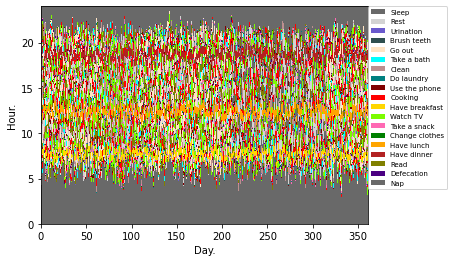

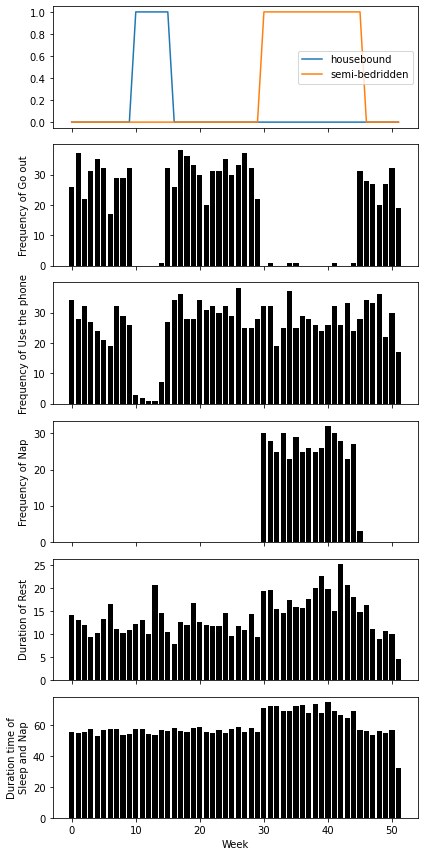

Finished (39.78999900817871[s])


In [31]:
temp_time = time.time()

# parameters that is changed and fixed while the resident is being housebound or semi-bedridden.
anomaly_parameters = {'housebound_go_out_num': 1/14,
                      'housebound_go_out_duration': 20,
                      'housebound_use_the_phone_num': 1/3,
                      'housebound_use_the_phone_duration': 10,
                      'semi_bedridden_nap_duration': 40,
                      'semi_bedridden_rest_duration': 60,
                      'semi_bedridden_go_out_num': 1/14,
                      'semi_bedridden_go_out_duration': 20}


#------------------------------------------------------------------------------
housebound_labels = [(timedelta(days = 7 * 10), timedelta(days = 7 * 15))]  # !! test setting !!
semi_bedridden_labels = [(timedelta(days = 7 * 30), timedelta(days = 7 * 45))]  # !! test setting !!
anomaly.save_MMSE(data_save_path, MMSE)
anomaly.save_housebound_labels(data_save_path, housebound_labels)
anomaly.save_housebound_labels(data_save_path, semi_bedridden_labels, 'semi_bedridden_labels')
anomaly.save_anomaly_parameters(data_save_path, anomaly_parameters)
#------------------------------------------------------------------------------


# generate an activity sequence (AS)
state_anomaly_labels = {anomaly.BEING_HOUSEBOUND: housebound_labels, anomaly.BEING_SEMI_BEDRIDDEN: semi_bedridden_labels}
act_model = activity_model.basic_activity_model
AS = new_functions.generate_activity_sequence(0, 360, path, original_act_model = act_model,
                                              state_anomaly_labels = state_anomaly_labels, anomaly_parameters = anomaly_parameters)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
new_functions.save_activity_sequence(data_save_path, AS)
new_functions.save_activity_sequence_as_image(data_save_path, AS, show = True, aspect_ratio = 10)  # time consuming!
    
# graph
step = timedelta(days = 7)
x_label = 'Week'

# activity information related to being housebound and being semi-bedridden
x_list = list(np.arange(len(list(new_functions.date_generator(AS[0].start, AS[-1].end, step)))))
go_out_freq = analysis.generate_block_time_histogram_of_activities(AS, [activity_model.go_out], step, target = 'frequency')
use_the_phone_freq = analysis.generate_block_time_histogram_of_activities(AS, [activity_model.use_the_phone], step, target = 'frequency')
nap_freq = analysis.generate_block_time_histogram_of_activities(AS, [activity_model.nap], step, target = 'frequency')
rest_duration = analysis.generate_block_time_histogram_of_activities(AS, [activity_model.rest], step, target = 'duration')
sleep_and_nap_duration = analysis.generate_block_time_histogram_of_activities(AS, [activity_model.sleep, activity_model.nap], step, target = 'duration')

housebound_state, semi_bedridden_state = [], []
for x in x_list:
    is_housebound, is_semi_bedridden = False, False
    for t in housebound_labels:
        if t[0] <= x * step <= t[1]:
            is_housebound = True
            break            
    for t in semi_bedridden_labels:
        if t[0] <= x * step <= t[1]:
            is_semi_bedridden = True
            break      
    housebound_state.append(int(is_housebound))
    semi_bedridden_state.append(int(is_semi_bedridden))
    
# graph
fig, ax = plt.subplots(6, 1, sharex = 'all', facecolor = 'w',  figsize = (6, 12))

ax[0].plot(x_list, housebound_state, color = 'tab:blue', label = 'housebound')
ax[0].plot(x_list, semi_bedridden_state, color = 'tab:orange', label = 'semi-bedridden')
ax[0].legend()

ax[1].bar(x_list, go_out_freq, color = 'black')
ax[1].set_ylabel('Frequency of Go out')
ax[2].bar(x_list, use_the_phone_freq, color = 'black')
ax[2].set_ylabel('Frequency of Use the phone')
ax[3].bar(x_list, nap_freq, color = 'black')
ax[3].set_ylabel('Frequency of Nap')
ax[4].bar(x_list, rest_duration, color = 'black')
ax[4].set_ylabel('Duration of Rest')
ax[5].bar(x_list, sleep_and_nap_duration, color = 'black')
ax[5].set_ylabel('Duration time of\nSleep and Nap')
ax[5].set_xlabel(x_label)
plt.tight_layout()
plt.savefig(str(data_save_path) + '/block_time_histogram.png', dpi = 100)
plt.show()
plt.close()

print("Finished ({}[s])".format(time.time() - temp_time))

## Wandering

### Simulate statistics of frequency and mean duration of wandering in each period.

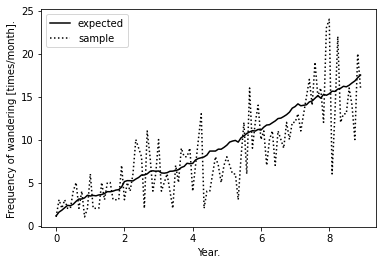

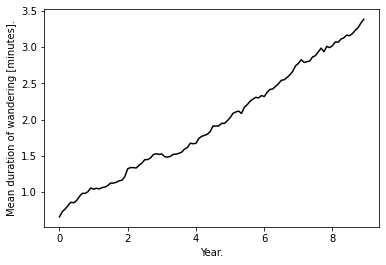

In [32]:
temp_time = time.time()

path = Path(layout_data_path / 'test_layout')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())

start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)

def calculate_wandering_mean_num(mmse):
    # decide the mean frequency of wandering [times/month]
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - 1.86 * mmse + 56
def calculate_wandering_mean_minutes(mmse):
    # decide the mean duration time [minutes] of wandering
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - 0.31 * mmse + 9.8

wandering_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_num)
wandering_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in wandering_mean_num]
wandering_mean_minutes = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_minutes)

# graph
graph_time_step = timedelta(days = 360)
plt.plot([x[0] / graph_time_step for x in wandering_mean_num], [x[2] for x in wandering_mean_num], color = 'k', label = 'expected')
plt.plot([x[0] / graph_time_step for x in wandering_num], [x[2] for x in wandering_num], color = 'k', linestyle = 'dotted', label = 'sample')
plt.xlabel('Year.')
plt.ylabel('Frequency of wandering [times/month].')
plt.legend()
plt.savefig(str(data_save_path) + '/frequency_of_wandering.png', dpi = 100)
plt.show()
plt.close()

plt.plot([x[0] / graph_time_step for x in wandering_mean_minutes], [x[2] for x in wandering_mean_minutes], color = 'k')
plt.xlabel('Year.')
plt.ylabel('Mean duration of wandering [minutes].')
plt.savefig(str(data_save_path) + '/mean_duration_of_wandering.png', dpi = 100)
plt.show()
plt.close()

anomaly.save_MMSE(data_save_path, MMSE)
anomaly.save_MMSE(data_save_path, wandering_num, 'wandering_num')
anomaly.save_MMSE(data_save_path, wandering_mean_minutes, 'wandering_mean_minutes')

### Simulate activity sequence with wandering

In [33]:
temp_time = time.time()


#------------------------------------------------------------------------------------
wandering_num = [(x[0], x[1], x[2] + 30) for x in wandering_num]                     # !! test setting !!
wandering_mean_minutes = [(x[0], x[1], x[2] + 1.5) for x in wandering_mean_minutes]  # !! test setting !!
#------------------------------------------------------------------------------------


# parameters that is changed and fixed while the resident is being housebound or semi-bedridden
anomaly_parameters = {'wandering_num': wandering_num,
                      'wandering_minute': wandering_mean_minutes}

anomaly.save_MMSE(data_save_path, MMSE)
anomaly.save_MMSE(data_save_path, wandering_num, 'wandering_num')
anomaly.save_MMSE(data_save_path, wandering_mean_minutes, 'wandering_mean_minutes')
anomaly.save_anomaly_parameters(data_save_path, anomaly_parameters)

# generate an activity sequence (AS)
AS = new_functions.generate_activity_sequence(0, 6, path, original_act_model = activity_model.basic_activity_model,
                                              anomaly_parameters = anomaly_parameters)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
new_functions.save_activity_sequence(data_save_path, AS)
new_functions.save_activity_sequence_as_image(data_save_path, AS)

# generate walking trajectories (WT)
indoor_movement = activity_model.indoor_movement
WT = new_functions.generate_walking_trajectories(path, AS, indoor_movement.stride, indoor_movement.step_speed, indoor_movement.prefer_foot)
print("Walking trajectories were generated in {} [s].".format(time.time() - temp_time))
new_functions.save_walking_trajectoires(data_save_path, WT)

# results of anomalies
wandering_result = []
for i, act in enumerate(AS):
    if act.activity.name == activity_model.wandering.name:
        wandering_result.append(i)
print("Total number of wanderings: {})".format(len(wandering_result)))

for i, wt in enumerate(WT):
    if wt.walking_type == new_functions.WANDERING_WALKING:
        print("index: {:04}, start: {}, end: {}, duration: {:.2f}[m].".format(i, wt.start_time, wt.end_time,
                                                                           (wt.end_time - wt.start_time)/timedelta(minutes = 1)))
        new_functions.save_layout(data_save_path, path, WT = [wt], filename = "{}-th wandering".format(i))

print("Finished ({}[s])".format(time.time() - temp_time))

anomaly.save_wandering_labels(data_save_path, WT)

An activity sequence was generated in 0.03399920463562012 [s].
Walking trajectories were generated in 26.154032230377197 [s].
Total number of wanderings: 5)
index: 0115, start: 1 day, 21:46:16.927716, end: 1 day, 21:47:54.527716, duration: 1.63[m].
index: 0178, start: 3 days, 8:35:12.305875, end: 3 days, 8:37:08.305875, duration: 1.93[m].
index: 0263, start: 4 days, 17:57:18.114505, end: 4 days, 17:59:50.914505, duration: 2.55[m].
index: 0287, start: 5 days, 9:46:19.810912, end: 5 days, 9:49:03.810912, duration: 2.73[m].
index: 0329, start: 6 days, 6:47:19.509206, end: 6 days, 6:49:01.909206, duration: 1.71[m].
Finished (27.924998998641968[s])


### Simulate sensor data with wandering

In [34]:
sensors = sensor_model.test_sensors  # for test_layout
motion_sensor_data = new_functions.generate_motion_sensor_data(sensors, WT, 
    sampling_seconds = 0.1, sync_reference_point = AS[0].start, body_radius = 10)
print("Sensor data was simulated in {}[s].".format(time.time() - temp_time))

new_functions.save_binary_sensor_data(data_save_path, sensors, motion_sensor_data, filename = 'PIR_pressure')

# save figures of wanderings
for i, wt in enumerate(WT):
    if wt.walking_type == new_functions.WANDERING_WALKING:
        print("index: {:04}, start: {}, end: {}, duration: {:.2f}[m].".format(i, wt.start_time, wt.end_time,
                                                                           (wt.end_time - wt.start_time)/timedelta(minutes = 1)))
        new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [wt], filename = "Sensor and {}-th wandering".format(i))
        wt.save_with_sensor_activations(data_save_path, "sensor_activation_in_{}-th_wandering".format(i), motion_sensor_data)

Sensor data was simulated in 190.6976523399353[s].
index: 0115, start: 1 day, 21:46:16.927716, end: 1 day, 21:47:54.527716, duration: 1.63[m].
index: 0178, start: 3 days, 8:35:12.305875, end: 3 days, 8:37:08.305875, duration: 1.93[m].
index: 0263, start: 4 days, 17:57:18.114505, end: 4 days, 17:59:50.914505, duration: 2.55[m].
index: 0287, start: 5 days, 9:46:19.810912, end: 5 days, 9:49:03.810912, duration: 2.73[m].
index: 0329, start: 6 days, 6:47:19.509206, end: 6 days, 6:49:01.909206, duration: 1.71[m].


## Falls while walking and falls while standing

### Statistics of frequency and mean duration of falls in each period

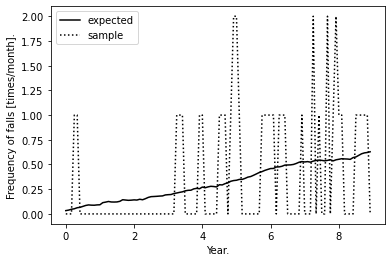

In [40]:
path = Path(layout_data_path / 'test_layout')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())

start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)

def calculate_falling_mean_num(mmse):
    # decide the mean number of falling
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - mmse / 15 + 2

# falling while walking
fall_w_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
fall_w_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_w_mean_num]

# fall while standing
fall_s_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
fall_s_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_s_mean_num]

# graph
graph_time_step = timedelta(days = 360)
plt.plot([x[0] / graph_time_step for x in fall_w_mean_num], [x[2] for x in fall_w_mean_num], color = 'k', label = 'expected')
plt.plot([x[0] / graph_time_step for x in fall_w_num], [x[2] for x in fall_w_num], color = 'k', linestyle = 'dotted', label = 'sample')
plt.xlabel('Year.')
plt.ylabel('Frequency of falls [times/month].')
plt.legend()
plt.savefig(str(data_save_path) + '/frequency_of_falls.png', dpi = 300)
plt.show()
plt.close()

anomaly.save_MMSE(data_save_path, MMSE)
anomaly.save_MMSE(data_save_path, fall_w_num, 'fall_w_num')
anomaly.save_MMSE(data_save_path, fall_s_num, 'fall_s_num')

### Simulate walking trajectories with falls

In [36]:
temp_time = time.time()

#------------------------------------------------------------------------------------
fall_w_num = [(x[0], x[1], x[2] + 2) for x in fall_w_num]  # !! test setting !!
fall_s_num = [(x[0], x[1], x[2] + 2) for x in fall_s_num]  # !! test setting !!
#------------------------------------------------------------------------------------

# fall_s_info['place'] defines the places that a resident may fall from high place
fall_s_place_bed = ['Bed']
fall_s_place = ['Bed', 'Sofa', 'Dinner_Table_Chair', 'Desk_Chair']

fall_w_parameters = {'num': fall_w_num, 'mean_lie_down_seconds': 30}
fall_s_parameters = {'num': fall_s_num, 'mean_lie_down_seconds': 30, 'place': fall_s_place_bed}

anomaly.save_MMSE(data_save_path, MMSE)
anomaly.save_anomaly_parameters(data_save_path, fall_w_parameters, 'fall_w_parameters')
anomaly.save_anomaly_parameters(data_save_path, fall_s_parameters, 'fall_s_parameters')

# generate an activity sequence (AS)
AS = new_functions.generate_activity_sequence(0, 6, path, original_act_model = activity_model.basic_activity_model)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
new_functions.save_activity_sequence(data_save_path, AS)
new_functions.save_activity_sequence_as_image(data_save_path, AS)

# generate walking trajectories (WT)
indoor_movement = activity_model.indoor_movement
WT = new_functions.generate_walking_trajectories(path, AS, indoor_movement.stride, indoor_movement.step_speed, indoor_movement.prefer_foot,
                                                 fall_w_parameters = fall_w_parameters, fall_s_parameters = fall_s_parameters)
print("Walking trajectories were generated in {} [s].".format(time.time() - temp_time))
new_functions.save_walking_trajectoires(data_save_path, WT)
anomaly.save_fall_labels(data_save_path, WT)

# save figures of walking trajectories with falls
print('Path that a fall while walking and a fall while standing both occurr: ')
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == True:
        new_functions.save_layout(data_save_path, path, WT = [wt], filename = "{}-th path".format(i))
        print("  w: For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_w_index],
                                                                                         wt.fall_w_index, wt.start_place, wt.end_place))
        # print("{} == duration: {}".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_s_index + 1] - wt.timestamp[wt.fall_s_index]))
        print("  s: For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_s, wt.timestamp[wt.fall_s_index],
                                                                                         wt.fall_s_index, wt.start_place, wt.end_place))
print('Path that a fall while walking occurrs: ')
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == False:
        new_functions.save_layout(data_save_path, path, WT = [wt], filename = "{}-th path".format(i))
        print("  For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_w_index],
                                                                                         wt.fall_w_index, wt.start_place, wt.end_place))
print('Path that a fall while standing occurrs: ')
for i, wt in enumerate(WT):
    if wt.fall_w == False and wt.fall_s == True:
        new_functions.save_layout(data_save_path, path, WT = [wt], filename = "{}-th path".format(i))
        print("  For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_s, wt.timestamp[wt.fall_s_index],
                                                                                         wt.fall_s_index, wt.start_place, wt.end_place))

An activity sequence was generated in 0.052033424377441406 [s].
Walking trajectories were generated in 17.126073122024536 [s].
Path that a fall while walking and a fall while standing both occurr: 
Path that a fall while walking occurrs: 
  For 38.64125301305908 seconds from 2 days, 20:22:04.807686 at 1-th step during a path from Entrance to Bathroom_Door.
  For 19.87429886623264 seconds from 4 days, 21:13:18.884085 at 2-th step during a path from Sofa to Wash_Machine.
Path that a fall while standing occurrs: 
  For 20.137401900165024 seconds from 3 days, 6:36:25.741299 at 0-th step during a path from Bed to Sofa.
  For 24.295679668508633 seconds from 6 days, 7:21:50.417094 at 0-th step during a path from Bed to Sofa.


### Simulate sensor data with falls

In [37]:
temp_time = time.time()

sensors = sensor_model.test_sensors  # for test_layout
motion_sensor_data = new_functions.generate_motion_sensor_data(sensors, WT, 
    sampling_seconds = 0.1, sync_reference_point = AS[0].start, body_radius = 10)
print("Sensor data was simulated in {}[s].".format(time.time() - temp_time))
    
# save the sensor data as a text file
new_functions.save_binary_sensor_data(data_save_path, sensors, motion_sensor_data, filename = 'PIR_pressure')

# save figures of falls
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == True:
        w_c = (wt.centers[wt.fall_w_index][0], wt.centers[wt.fall_w_index][1])
        s_c = (wt.centers[wt.fall_s_index][0], wt.centers[wt.fall_s_index][1])
        file_name = "{}-th path with fall_w at ({},{}) and fall_s at ({}, {})".format(i, w_c[0], w_c[1], s_c[0], s_c[1])
        new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [wt], filename = file_name, mark_point = [w_c, s_c])
        wt.save_with_sensor_activations(data_save_path, "sensor_activation_in_{}-th_path".format(i), motion_sensor_data)
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == False:
        w_c = (wt.centers[wt.fall_w_index][0], wt.centers[wt.fall_w_index][1])
        file_name = "{}-th path with fall_w at ({},{})".format(i, w_c[0], w_c[1])
        new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [wt], filename = file_name, mark_point = [w_c])
        wt.save_with_sensor_activations(data_save_path, "sensor_activation_in_{}-th_path".format(i), motion_sensor_data)
for i, wt in enumerate(WT):
    if wt.fall_w == False and wt.fall_s == True:
        s_c = (wt.centers[wt.fall_s_index][0], wt.centers[wt.fall_s_index][1])
        file_name = "{}-th path with fall_s at ({},{})".format(i, s_c[0], s_c[1])
        new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [wt], filename = file_name, mark_point = [s_c])
        wt.save_with_sensor_activations(data_save_path, "sensor_activation_in_{}-th_path".format(i), motion_sensor_data)
        
print("Figures are saved in {}[s].".format(time.time() - temp_time))

Sensor data was simulated in 14.093341588973999[s].
Figures are saved in 17.52949023246765[s].


## Forgetting

### Statistics of frequency of forgettings in each period

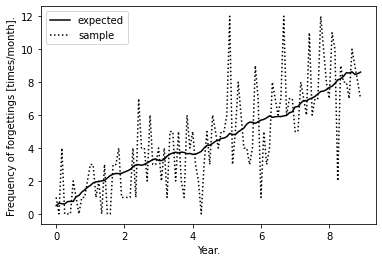

In [41]:
temp_time = time.time()

path = Path(layout_data_path / 'test_layout')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())

start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)

def calculate_forgetting_mean_num(mmse):
    # This returns the mean number of forgetting by MMSE
    return - mmse + 30

forgetting_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_forgetting_mean_num)
forgetting_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in forgetting_mean_num]

# graph
graph_time_step = timedelta(days = 360)
plt.plot([x[0] / graph_time_step for x in forgetting_mean_num], [x[2] for x in forgetting_mean_num], color = 'k', label = 'expected')
plt.plot([x[0] / graph_time_step for x in forgetting_num], [x[2] for x in forgetting_num], color = 'k', linestyle = 'dotted', label = 'sample')
plt.xlabel('Year.')
plt.ylabel('Frequency of forgettings [times/month].')
plt.legend()
plt.savefig(str(data_save_path) + '/frequency_of_forgettings.png', dpi = 300)
plt.show()
plt.close()

anomaly.save_MMSE(data_save_path, MMSE)
anomaly.save_MMSE(data_save_path, forgetting_num, 'forgetting_num')

### Simulate sensor data with forgetting, using information generated in the above jupyter-notebook cell.

In [43]:
temp_time = time.time()


# ----------------------------------------------------------------------------------------
forgetting_num = [(x[0], x[1], 2) for x in forgetting_mean_num]       # !! test setting !!
# ----------------------------------------------------------------------------------------

anomaly.save_MMSE(data_save_path, MMSE)
anomaly.save_MMSE(data_save_path, forgetting_num, 'forgetting_num')

path = Path(layout_data_path / 'test_layout')

# generate an activity sequence (AS)
AS = new_functions.generate_activity_sequence(0, 10, path, original_act_model = activity_model.applied_activity_model_2)
print("Activity sequence was generated in {}[s].".format(time.time() - temp_time))
new_functions.save_activity_sequence(data_save_path, AS)
new_functions.save_activity_sequence_as_image(data_save_path, AS)

# generate walking trajectories (WT)
indoor_movement = activity_model.indoor_movement  # parameters about walking
WT = new_functions.generate_walking_trajectories(path, AS, indoor_movement.stride, indoor_movement.step_speed, indoor_movement.prefer_foot)
print("Walking trajectories were generated in {}[s].".format(time.time() - temp_time))

# Activities that are candidates of forgetting
forgetting_activities_dict = {act.activity.name: act.activity.home_equipment for act in AS if act.activity.home_equipment != {}}
print("Activities related with home appliances.")
pprint.pprint(forgetting_activities_dict)

# decide which activities are forgetting and how long the forgetting continues
forgetting_labels = anomaly.forgetting_labels(AS, WT, forgetting_num)
for x in forgetting_labels:
    print("{} ({} - {}), forgetting: {}-th {}, notice: {}-th {} ".format(x[2], x[4], x[5], x[0], AS[x[0]].activity.name,
                                                                         x[1], AS[x[1]].activity.name))
print("Forgetting label was simulated in {}[s].".format(time.time() - temp_time))
anomaly.save_forgetting_labels(data_save_path, forgetting_labels)

sensors = sensor_model.test_sensors  # for test_layout
cost_sensor_data = new_functions.generate_cost_sensor_data(sensors, AS, WT, sampling_seconds = 1,
                                                           sync_reference_point = AS[0].start, forgetting_labels = forgetting_labels)
new_functions.save_binary_sensor_data(data_save_path, sensors, cost_sensor_data, filename = "cost")
print("Finished ({}[s])".format(time.time() - temp_time))

Activity sequence was generated in 0.026000022888183594[s].
Walking trajectories were generated in 30.474400997161865[s].
Activities related with home appliances.
{'Brush teeth': {'water flow sensor in bathroom': 1},
 'Cooking': {'electric energy meter at kitchen': 1,
             'water flow sensor at kitchen': 1},
 'Take a bath': {'water flow sensor in bathroom': 1},
 'Watch TV': {'electric energy meter of TV': 1}}
water flow sensor at kitchen (8 days, 13:32:42.202645 - 8 days, 14:12:09.083037), forgetting: 453-th Cooking, notice: 455-th Cooking 
electric energy meter of TV (10 days, 10:30:52.222765 - 10 days, 10:55:55.654283), forgetting: 540-th Watch TV, notice: 542-th Rest 
Forgetting label was simulated in 30.476402282714844[s].
Finished (35.363402128219604[s])


### Total cost of home equipments

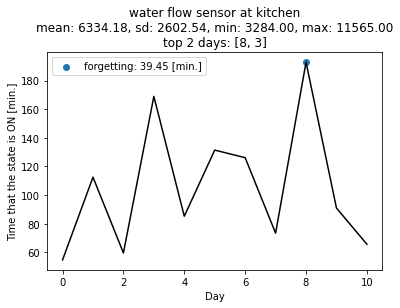

No handles with labels found to put in legend.


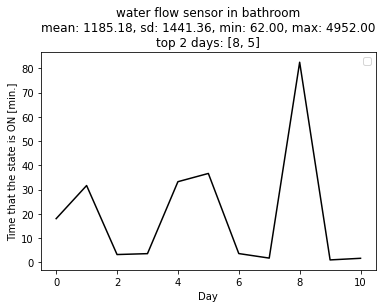

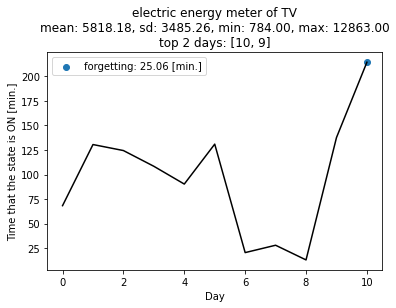

No handles with labels found to put in legend.


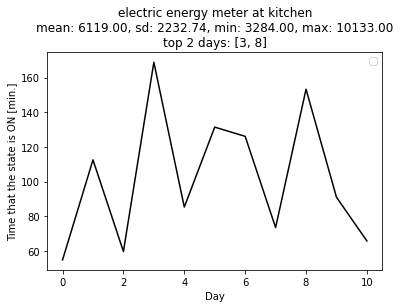

In [44]:
cost_step = timedelta(days = 1)

# calculate the block histogram of cost
cost_dict = dict()
statistics_dict = dict()
topK_dict = dict()
K = 2
for s in sensors:
    if isinstance(s, sensor_model.CostSensor):
        seconds = np.array(analysis.generate_on_seconds_histogram(cost_sensor_data, s.index, cost_step))
        cost_dict[s.name] = seconds
        statistics_dict[s.name] = "mean: {:.2f}, sd: {:.2f}, min: {:.2f}, max: {:.2f}".format(seconds.mean(),
                                                              np.sqrt(seconds.var()), seconds.min(), seconds.max())
        topK_dict[s.name] = "top {} days: {}".format(K, analysis.top_K_cost(seconds, K = K))
        
# plot
for (k, values) in cost_dict.items():
    file_name = "cost of {}".format(k)
    cost_min = [v / 60 for v in values]
    plt.plot(range(len(cost_min)), cost_min, color = 'black')
    for f in forgetting_labels:
        if f[2] == k:
            d = f[4].days
            plt.scatter(d, cost_min[d], label = "forgetting: {:.2f} [min.]".format((f[5] - f[4]).total_seconds() / 60))
    plt.xlabel('Day')
    plt.ylabel('Time that the state is ON [min.]')
    plt.title(k + '\n' + statistics_dict[k] + '\n' + topK_dict[k])
    plt.legend()
    plt.savefig(data_save_path / Path(file_name), dpi = 300, bbox_inches = 'tight')
    plt.show()
    plt.close()

## Six anomalies

### Statistics of all anomalies

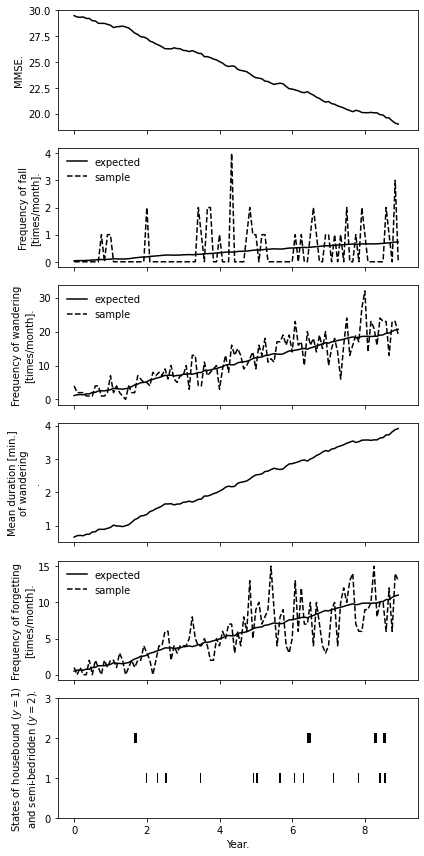

In [2]:
temp_time = time.time()

# test layout
path = Path(layout_data_path / 'test_layout')
data_save_path = new_functions.generate_data_folder(path, new_functions.present_date_and_time())

# MMSE score
start, end, step = timedelta(days = 0), timedelta(days = 9 * 360), timedelta(days = 30)
MMSE = anomaly.simulate_MMSE(start, end, step, error_e = 0)

# Housebound
# housebound_labels[i] = (start_time, end_time) of i-th being housebound
housebound_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/10, 14, 14/5)

# Semi-bedridden
# semi_bedridden_labels[i] = (start_time, end_time) of i-th being semi-bedridden
semi_bedridden_labels = anomaly.simulate_state_anomaly_periods(MMSE, 1/20, 30, 30/5)

# Wandering
def calculate_wandering_mean_num(mmse):
    # decide the mean frequency of wandering [times/month]
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - 1.86 * mmse + 56
def calculate_wandering_mean_minutes(mmse):
    # decide the mean duration time [minutes] of wandering
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - 0.31 * mmse + 9.8
wandering_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_num)
wandering_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in wandering_mean_num]
wandering_mean_minutes = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_wandering_mean_minutes)

# Falls
def calculate_falling_mean_num(mmse):
    # decide the mean number [times/month] of falling
    if mmse < 0 or 30 < mmse:
        raise ValueError('mmse must be 0 <= mmse <= 30')
    return - mmse / 15 + 2
# falling while walking (fall_w)
fall_w_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
fall_w_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_w_mean_num]
# fall while standing (fall_s)
fall_s_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_falling_mean_num)
fall_s_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in fall_s_mean_num]

# Forgetting
def calculate_forgetting_mean_num(mmse):
    # This returns the mean number of forgetting [times/month] by MMSE
    return - mmse + 30

forgetting_mean_num = anomaly.simulate_values_from_MMSE(MMSE, start, end, step, calculate_forgetting_mean_num)
forgetting_num = [(x[0], x[1], stats.poisson.rvs(x[2])) for x in forgetting_mean_num]


# Figures of anomalies
fig, ax = plt.subplots(6, 1, sharex = 'all', facecolor = 'w',  figsize = (6, 12))
graph_list = [MMSE, fall_w_mean_num, wandering_mean_num, wandering_mean_minutes, forgetting_mean_num]
samples_list = [[], fall_w_num, wandering_num, [], forgetting_num]
label_ylabel_list = ['MMSE.', 'Frequency of fall\n[times/month].', 'Frequency of wandering\n[times/month].',
                     'Mean duration [min.]\nof wandering\n.', 'Frequency of forgetting\n[times/month].']
graph_time_step = timedelta(days = 360)
for (i, data) in enumerate(zip(graph_list, samples_list, label_ylabel_list)):
    x, samples, label = data[0], data[1], data[2]
    ax[i].plot([xx[0] / graph_time_step for xx in x], [xx[2] for xx in x], 'k-', label = 'expected')
    if i == 1 or i == 2 or i == 4:
        ax[i].plot([xx[0] / graph_time_step for xx in samples], [xx[2] for xx in samples], 'k--', label = 'sample')
    ax[i].set_ylabel(label)
ax[1].legend(loc = 'best', frameon = False)
ax[2].legend(loc = 'best', frameon = False)
ax[4].legend(loc = 'best', frameon = False)
# ax[4].set_xlabel('Year.')

point_0, point_last = (timedelta(days = 0), timedelta(days = 0)), (timedelta(days = MMSE[-1][1].days), timedelta(days =  MMSE[-1][1].days))
graph_housebound = deepcopy(housebound_labels)
graph_semi_bedridden = deepcopy(semi_bedridden_labels)
for p in [point_0, point_last]:
    graph_housebound.append(p)
    graph_semi_bedridden.append(p)
ax[5].set_xlabel('Year.')
ax[5].set_ylabel('States of housebound ($y = 1$)\nand semi-bedridden ($y = 2$).')
ax[5].set_ylim(0, 3)
for interval in graph_housebound:
    ax[5].hlines(1, interval[0]/graph_time_step, interval[1]/graph_time_step, color = 'black', linewidth = 10.0)
for interval in graph_semi_bedridden:
    ax[5].hlines(2, interval[0]/graph_time_step, interval[1]/graph_time_step, color = 'black', linewidth = 10.0)

plt.tight_layout()
plt.savefig(str(data_save_path) + '/anomaly_parameter_transitions.png', dpi = 500)
plt.show()
plt.close()

### Simulate sensor data with multiple anomalies

In [3]:
#-----!! test setting for short days !!----------------------------------------------------
housebound_labels = [(timedelta(days = 7 * 10), timedelta(days = 7 * 15))]  # fixed
semi_bedridden_labels = [(timedelta(days = 7 * 30), timedelta(days = 7 * 45))]  # fixed
wandering_num = [(x[0], x[1], x[2] + 10) for x in wandering_num]  # + 10
wandering_mean_minutes = [(x[0], x[1], x[2] + 0.2) for x in wandering_mean_minutes]  # + 0.2
fall_w_num = [(x[0], x[1], x[2] + 3) for x in fall_w_num]  # +3
fall_s_num = [(x[0], x[1], x[2] + 3) for x in fall_s_num]  # +3
forgetting_num = [(x[0], x[1], 3) for x in forgetting_mean_num]  # fixed
#------------------------------------------------------------------------------------------


# fall_s_info['place'] defines the places that a resident may fall from high place
fall_s_place_bed = ['Bed']
# fall_s_place = ['Bed', 'Sofa', 'Dinner_Table_Chair', 'Desk_Chair']
fall_w_parameters = {'num': fall_w_num, 'mean_lie_down_seconds': 30}
fall_s_parameters = {'num': fall_s_num, 'mean_lie_down_seconds': 30, 'place': fall_s_place_bed}
anomaly_parameters = {'housebound_go_out_num': 1/14,
                      'housebound_go_out_duration': 20,
                      'housebound_use_the_phone_num': 1/3,
                      'housebound_use_the_phone_duration': 10,
                      'semi_bedridden_nap_duration': 40,
                      'semi_bedridden_rest_duration': 60,
                      'semi_bedridden_go_out_num': 1/14,
                      'semi_bedridden_go_out_duration': 20,
                      'wandering_num': wandering_num,
                      'wandering_minute': wandering_mean_minutes}


# Activity sequence (AS)
state_anomaly_labels = {anomaly.BEING_HOUSEBOUND: housebound_labels, anomaly.BEING_SEMI_BEDRIDDEN: semi_bedridden_labels}
act_model = activity_model.basic_activity_model
AS = new_functions.generate_activity_sequence(0, 10, path, original_act_model = act_model,
                                              state_anomaly_labels = state_anomaly_labels, anomaly_parameters = anomaly_parameters)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
new_functions.save_activity_sequence(data_save_path, AS)
new_functions.save_activity_sequence_as_image(data_save_path, AS)


# Walking trajectories (WT)
indoor_movement = activity_model.indoor_movement  # parameters about walking
WT = new_functions.generate_walking_trajectories(path, AS, indoor_movement.stride, indoor_movement.step_speed, indoor_movement.prefer_foot,
                                                 fall_w_parameters = fall_w_parameters, fall_s_parameters = fall_s_parameters)
print("Walking trajectories were generated in {} [s].".format(time.time() - temp_time))
        

# Motion sensor data
sensors = sensor_model.test_sensors  # for test_layout
motion_sensor_data = new_functions.generate_motion_sensor_data(sensors, WT, 
    sampling_seconds = 0.1, sync_reference_point = AS[0].start, body_radius = 10)
print("Motion sensor data was simulated in {}[s].".format(time.time() - temp_time))
new_functions.save_binary_sensor_data(data_save_path, sensors, motion_sensor_data, filename = "PIR_pressure")

# decide which activities are forgetting and how long the forgetting continues
forgetting_labels = anomaly.forgetting_labels(AS, WT, forgetting_num)
cost_sensor_data = new_functions.generate_cost_sensor_data(sensors, AS, WT, sampling_seconds = 1,
                                                           sync_reference_point = AS[0].start, forgetting_labels = forgetting_labels)
new_functions.save_binary_sensor_data(data_save_path, sensors, cost_sensor_data, filename = "cost")
print("Cost sensor data was simulated in {}[s].".format(time.time() - temp_time))


# Results of anomalies
print('Results of anomalies---------------------------')

print("hosuebound_labels: {}".format(housebound_labels))

print("semi_bedridden_labels: {}".format(semi_bedridden_labels))

wandering_result = []
for i, act in enumerate(AS):
    if act.activity.name == activity_model.wandering.name:
        wandering_result.append(i)
print("Total number of wanderings: {})".format(len(wandering_result)))
for i, wt in enumerate(WT):
    if wt.walking_type == new_functions.WANDERING_WALKING:
        print("index: {:04}, start: {}, end: {}, duration: {:.2f}[m].".format(i, wt.start_time, wt.end_time,
                                                                           (wt.end_time - wt.start_time)/timedelta(minutes = 1)))
        new_functions.save_layout(data_save_path, path, sensors = sensors, WT = [wt], filename = "Sensor and {}-th wandering".format(i))

print('Path that a fall while walking and a fall while standing both occurr: ')
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == True:
        print("  w: For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_w_index],
                                                                                         wt.fall_w_index, wt.start_place, wt.end_place))
        # print("{} == duration: {}".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_s_index + 1] - wt.timestamp[wt.fall_s_index]))
        print("  s: For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_s, wt.timestamp[wt.fall_s_index],
                                                                                         wt.fall_s_index, wt.start_place, wt.end_place))
print('Path that a fall while walking occurrs: ')
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == False:
        print("  For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_w_index],
                                                                                         wt.fall_w_index, wt.start_place, wt.end_place))
print('Path that a fall while standing occurrs: ')
for i, wt in enumerate(WT):
    if wt.fall_w == False and wt.fall_s == True:
        print("  For {} seconds from {} at {}-th step during a path from {} to {}.".format(wt.lie_down_seconds_s, wt.timestamp[wt.fall_s_index],
                                                                                         wt.fall_s_index, wt.start_place, wt.end_place))
for x in forgetting_labels:
    print("{} ({} - {}), forgetting: {}-th {}, notice: {}-th {} ".format(x[2], x[4], x[5], x[0], AS[x[0]].activity.name,
                                                                         x[1], AS[x[1]].activity.name))

print("Finished ({}[s])".format(time.time() - temp_time))

# save labels of anomalies
anomaly_labels_path = data_save_path / Path('anomaly_labels')
if not os.path.exists(path):
    os.makedirs(path)
anomaly.save_MMSE(anomaly_labels_path, MMSE)
anomaly.save_MMSE(anomaly_labels_path, wandering_num, 'wandering_num')
anomaly.save_MMSE(anomaly_labels_path, wandering_mean_minutes, 'wandering_mean_minutes')
anomaly.save_anomaly_parameters(anomaly_labels_path, fall_w_parameters, 'fall_w_parameters')
anomaly.save_anomaly_parameters(anomaly_labels_path, fall_s_parameters, 'fall_s_parameters')
anomaly.save_MMSE(anomaly_labels_path, forgetting_num, 'forgetting_num')
anomaly.save_housebound_labels(anomaly_labels_path, housebound_labels)
anomaly.save_housebound_labels(anomaly_labels_path, semi_bedridden_labels, 'semi_bedridden_labels')
anomaly.save_wandering_labels(anomaly_labels_path, WT)
anomaly.save_fall_labels(anomaly_labels_path, WT)
anomaly.save_forgetting_labels(anomaly_labels_path, forgetting_labels)

An activity sequence was generated in 2.007094621658325 [s].
Walking trajectories were generated in 37.898001194000244 [s].
Motion sensor data was simulated in 66.31603407859802[s].
Cost sensor data was simulated in 71.26200270652771[s].
Results of anomalies---------------------------
hosuebound_labels: [(datetime.timedelta(days=70), datetime.timedelta(days=105))]
semi_bedridden_labels: [(datetime.timedelta(days=210), datetime.timedelta(days=315))]
Total number of wanderings: 8)
index: 0097, start: 1 day, 14:47:51.057261, end: 1 day, 14:48:26.257261, duration: 0.59[m].
index: 0108, start: 1 day, 16:26:40.819820, end: 1 day, 16:27:26.419820, duration: 0.76[m].
index: 0233, start: 4 days, 6:45:17.432585, end: 4 days, 6:46:18.232585, duration: 1.01[m].
index: 0311, start: 5 days, 14:56:52.272206, end: 5 days, 14:57:42.672206, duration: 0.84[m].
index: 0321, start: 5 days, 17:44:26.459796, end: 5 days, 17:45:14.459796, duration: 0.80[m].
index: 0442, start: 7 days, 17:23:16.823014, end: 7 